#Python Data Visualizations
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [5]:
os.getcwd()
df = pd.read_csv('Iris.csv')

In [6]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [8]:
# let's check the number of examples in each species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

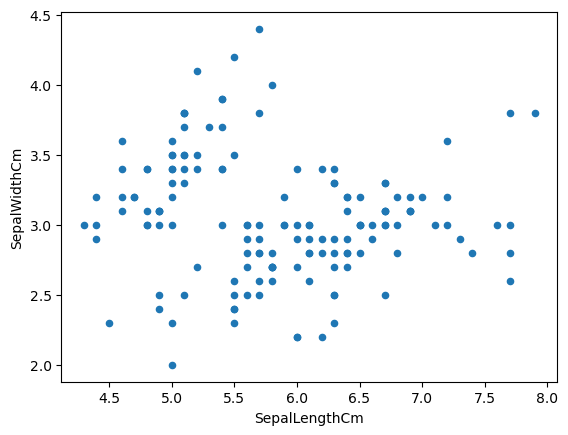

In [9]:
#The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
df.plot(kind = 'scatter', x = 'SepalLengthCm', y= 'SepalWidthCm')

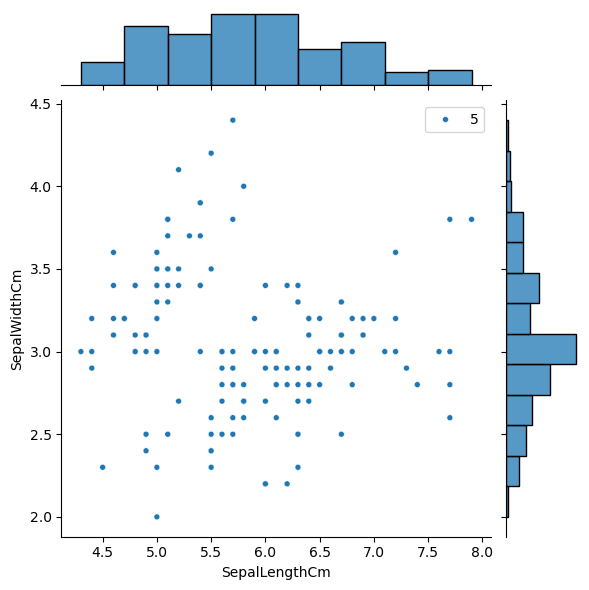

In [14]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x = 'SepalLengthCm', y= 'SepalWidthCm', data = df, size = 5)

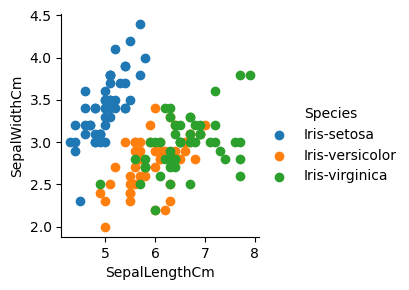

In [24]:
# One piece of information missing in the plots above is what species each plant is
# We'll use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(df, hue="Species")\
.map (plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
.add_legend()


<Axes: xlabel='Species', ylabel='PetalLengthCm'>

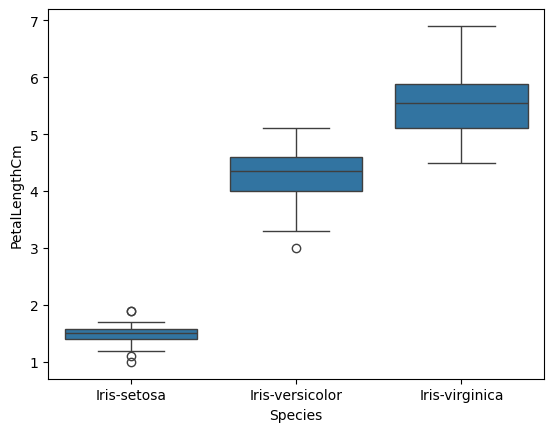

In [25]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x='Species',y='PetalLengthCm', data = df)

C:\Users\jeetb\AppData\Local\Temp\ipykernel_23776\577861183.py:10: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(x='Species',y='PetalLengthCm', data = df, jitter=True, edgecolor='gray')


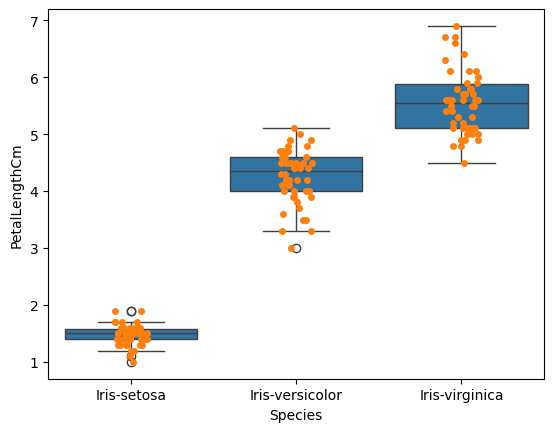

In [36]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the species
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x='Species',y='PetalLengthCm', data = df)
ax = sns.stripplot(x='Species',y='PetalLengthCm', data = df, jitter=True, edgecolor='gray')

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

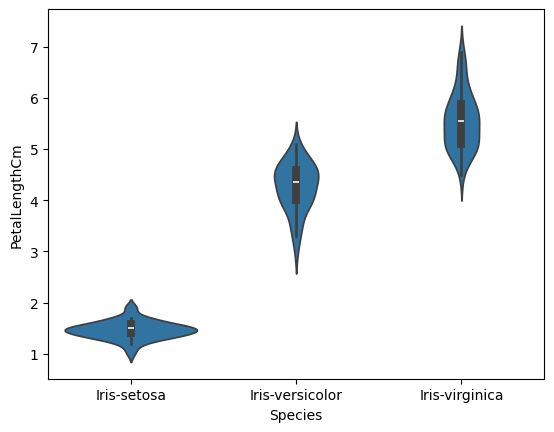

In [30]:
# A violin plot combines the benefits of the previous two plots and simplifies them
sns.violinplot(x='Species',y='PetalLengthCm', data = df)

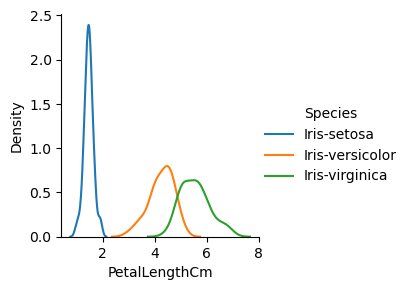

In [32]:
sns.FacetGrid(df, hue="Species") \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

c:\Users\jeetb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


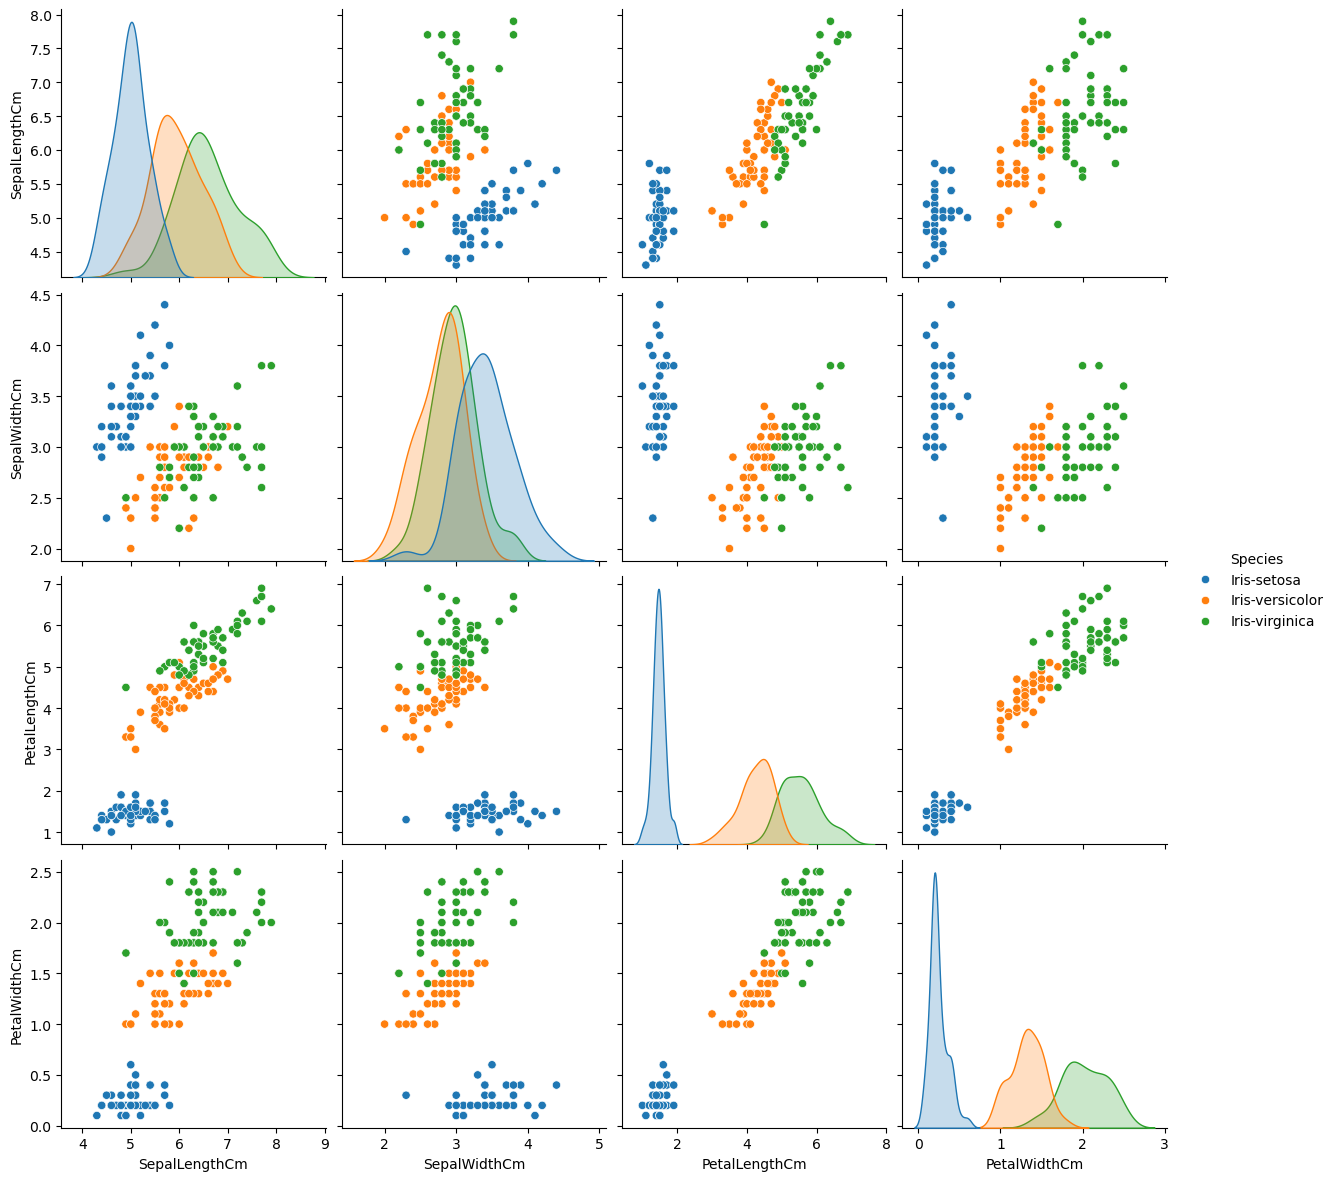

In [33]:
# we will create pairplot by dropping the Id details
sns.pairplot(df.drop('Id', axis = 1), hue='Species', size = 3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

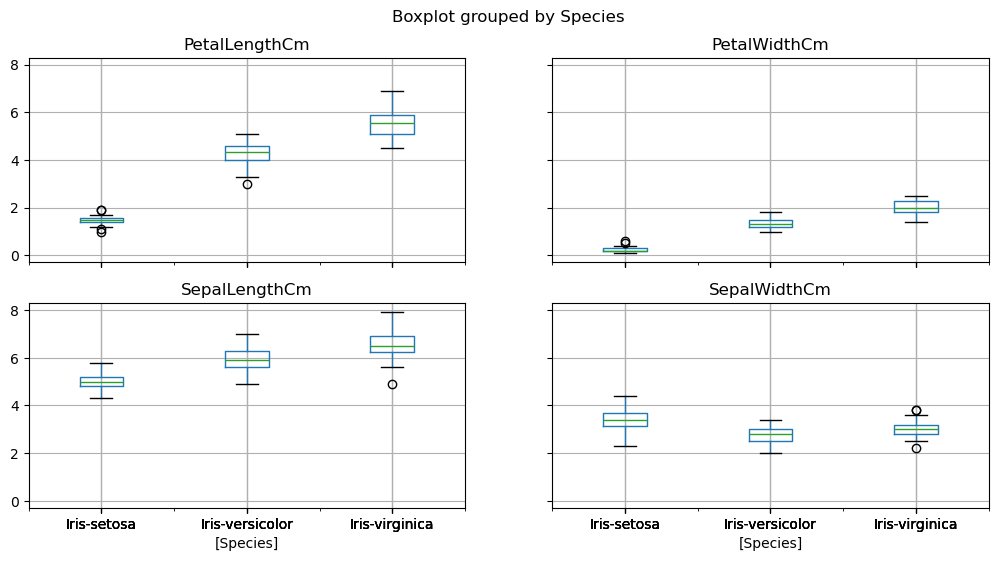

In [34]:
# creating box plot for species
df.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

<Axes: >

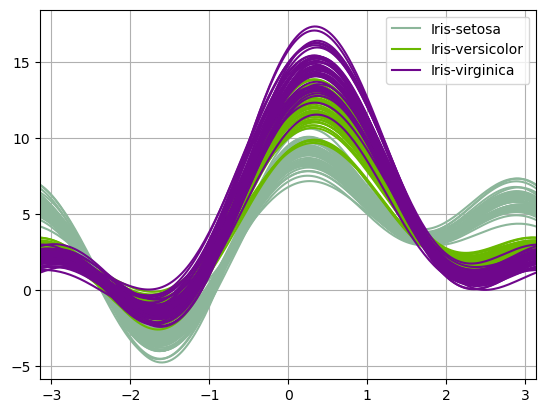

In [41]:
#Andrews Curves
from pandas.plotting import andrews_curves
andrews_curves(df.drop("Id", axis=1), "Species")

<Axes: >

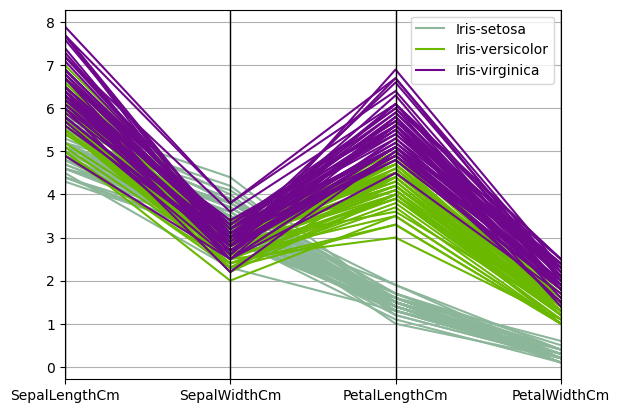

In [42]:
#parallel_coordinates
from pandas.plotting import parallel_coordinates
parallel_coordinates(df.drop("Id", axis=1), "Species")

<Axes: >

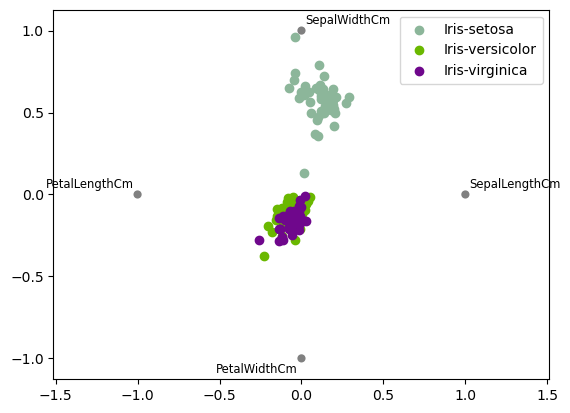

In [43]:
#radviz
from pandas.plotting import radviz
radviz(df.drop("Id", axis=1), "Species")